In [44]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import umap


job2vec = KeyedVectors.load('job2vec.kv', mmap='r')

## Compute several job similarities to *landscaping*

In [46]:
job2vec.cosine_similarities(
    job2vec['landscaping'],
    [job2vec['landscaper'], job2vec['gardener'], job2vec['author'], job2vec['electrician'], job2vec['doctor']]
)

array([0.94036454, 0.7870552 , 0.56887895, 0.7285097 , 0.67997193],
      dtype=float32)

## Getting the Most Similar Jobs to a Target Job

Let's ask Gensim to tell us which jobs are most similar to _professor_, _history teacher_, and _retired nurse_.

In [47]:
for start_job in ['professor', 'history teacher', 'retired nurse']:
    print(f'\nMost similar jobs to "{start_job}":')
    for job, similarity_score in job2vec.most_similar(positive=[start_job]):
        print(f'\t{job}')


Most similar jobs to "professor":
	professor of history and theology
	professor of biology
	professorconsultant
	prof emeritus
	physicianprofessor
	history prof
	rolfer
	prof
	vice provost
	pt

Most similar jobs to "history teacher":
	high school teacher
	teachers
	teachet
	elementary school teacher
	montessori teacher
	special ed teacher
	part time teacher
	parttime teacher
	special education teacher
	high school english teacher

Most similar jobs to "retired nurse":
	retired lawyer
	not employed
	retired rn
	advanced practice nurse
	nursing
	retirednot employed
	architects
	rn care manager
	family nurse practitioner
	public health nurse


## Solving a Job Analogy
Let's ask Gensim: _teacher_ is to _history teacher_ as _professor_ is to **???**:

In [48]:
for job, similarity_score in job2vec.most_similar(positive=['history teacher', 'professor'], negative=['teacher']):
    print(job)

professor of history and theology
professor of biology
vice provost
history prof
music professor
professor of music
herbalife distributor
professor of english
rigger
physicianprofessor


## Produce a 2D plot of embeddings using UMAP

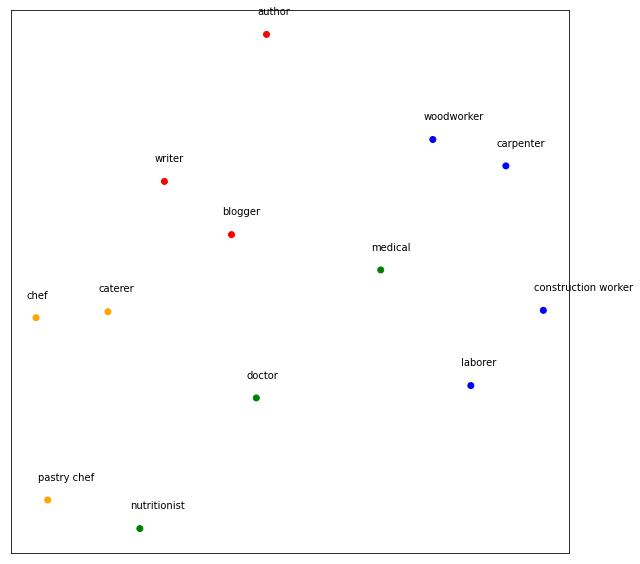

In [50]:
jobs = [
    'construction worker', 'laborer', 'carpenter', 'woodworker',
    'chef', 'pastry chef', 'caterer',
    'doctor', 'medical', 'nutritionist',
    'author', 'blogger', 'writer'
]

vectors = [
    job2vec[o]
    for o in jobs
]
umap_data = umap.UMAP(
    n_neighbors=5,
    min_dist=0.3,
    n_components=2,
    metric='cosine',
    random_state=42
).fit_transform(vectors)

fig = plt.figure(figsize=(10,10))
plt.scatter(
    umap_data[:,0], umap_data[:,1],
    c=4*['blue'] + 3*['orange'] + 3*['green'] + 3*['red']
)

for label, (x, y) in zip(jobs, umap_data):
    plt.annotate(
        label,
        xy=(x-.1, y+.08),
        xytext=(0, 0),
        textcoords='offset points'
    )

plt.xticks([])
plt.yticks([])
plt.savefig('./job2vec_umap.png', dpi=300)